In [6]:
import geopandas as gpd
from shapely.geometry import LineString
import rasterio
import numpy as np
from rasterio.sample import sample_gen
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Point



In [7]:

# —à–ª—è—Ö –¥–æ —Ç–≤–æ–≥–æ —Ñ–∞–π–ª—É GeoParquet
gdf = gpd.read_parquet("geo_parqet_file/atl03x_1_2025-05-07_13_06_41_393.parquet_GEO.parquet")




In [5]:
print(gdf.crs)

{"$schema": "https://proj.org/schemas/v0.5/projjson.schema.json", "type": "GeographicCRS", "name": "WGS 84 longitude-latitude", "datum": {"type": "GeodeticReferenceFrame", "name": "World Geodetic System 1984", "ellipsoid": {"name": "WGS 84", "semi_major_axis": 6378137, "inverse_flattening": 298.257223563}}, "coordinate_system": {"subtype": "ellipsoidal", "axis": [{"name": "Geodetic longitude", "abbreviation": "Lon", "direction": "east", "unit": "degree"}, {"name": "Geodetic latitude", "abbreviation": "Lat", "direction": "north", "unit": "degree"}]}, "id": {"authority": "OGC", "code": "CRS84"}}


In [3]:

dem_path = "data_clipped/tandem/tan_dem_ellip.tif"

with rasterio.open(dem_path) as src:
    dem_crs = src.crs
    print("DEM CRS:", dem_crs)


DEM CRS: EPSG:4979


In [31]:

print("CRS:", gdf.crs)

# === 1. –®–ª—è—Ö –¥–æ geoid-–º–æ–¥–µ–ª—ñ (–Ω–∞–ø—Ä–∏–∫–ª–∞–¥, EGG2015.tif) ===
geoid_path = "/mnt/c/Users/5302/PycharmProjects/geoid/data/raw_data/egg_2015.tif"


# –∫–æ–æ—Ä–¥–∏–Ω–∞—Ç–∏ —Ç–æ—á–æ–∫
coords = [(geom.x, geom.y) for geom in gdf.geometry]

# –≤–∏—Ç—è–≥ –∑–Ω–∞—á–µ–Ω—å –∑ –º–æ–¥–µ–ª—ñ –∫–≤–∞–∑—ñ–≥–µ–æ—ó–¥–∞
with rasterio.open(geoid_path) as geoid_src:
    geoid_values = list(sample_gen(geoid_src, coords))

# –¥–æ–¥–∞–≤–∞–Ω–Ω—è –≥–µ–æ—ó–¥–Ω–æ—ó —Ç–∞ –æ—Ä—Ç–æ–º–µ—Ç—Ä–∏—á–Ω–æ—ó –≤–∏—Å–æ—Ç–∏
gdf["geoid_height"] = [val[0] if val else np.nan for val in geoid_values]
gdf["orthometric_height"] = gdf["height"] - gdf["geoid_height"]


# === 5. –ó–±–µ—Ä–µ–≥—Ç–∏ —Ä–µ–∑—É–ª—å—Ç–∞—Ç (–Ω–∞–ø—Ä–∏–∫–ª–∞–¥, —è–∫ GeoParquet –∞–±–æ GeoPackage) ===
gdf.to_parquet("icesat2_region_orthometric.parquet")


CRS: {"$schema": "https://proj.org/schemas/v0.5/projjson.schema.json", "type": "GeographicCRS", "name": "WGS 84 longitude-latitude", "datum": {"type": "GeodeticReferenceFrame", "name": "World Geodetic System 1984", "ellipsoid": {"name": "WGS 84", "semi_major_axis": 6378137, "inverse_flattening": 298.257223563}}, "coordinate_system": {"subtype": "ellipsoidal", "axis": [{"name": "Geodetic longitude", "abbreviation": "Lon", "direction": "east", "unit": "degree"}, {"name": "Geodetic latitude", "abbreviation": "Lat", "direction": "north", "unit": "degree"}]}, "id": {"authority": "OGC", "code": "CRS84"}}


In [11]:
ice_gdf = gpd.read_parquet("icesat2_region_orthometric.parquet")

In [12]:
ice_gdf.head()

region  gt  spacecraft_velocity  \
time_ns                                                          
2019-03-03 19:21:21.423950592       6  50          7108.268555   
2019-03-03 19:21:21.424350464       6  50          7108.268555   
2019-03-03 19:21:21.424650752       6  50          7108.268555   
2019-03-03 19:21:21.424750592       6  50          7108.268555   
2019-03-03 19:21:21.425250560       6  50          7108.268555   

                               solar_elevation  rgt  ph_index      height  \
time_ns                                                                     
2019-03-03 19:21:21.423950592       -32.253899  998    123494  637.587952   
2019-03-03 19:21:21.424350464       -32.253899  998    123497  615.246338   
2019-03-03 19:21:21.424650752       -32.253899  998    123498  646.714050   
2019-03-03 19:21:21.424750592       -32.253899  998    123499  650.420288   
2019-03-03 19:21:21.425250560       -32.253899  998    123500  647.244324   

                               atl08_class  spot         x_atc        y_atc  \
time_ns                                                                       
2019-03-03 19:21:21.423950592            3     5  1.472135e+07 -1802.341553   
2019-03-03 19:21:21.424350464            2     5  1.472135e+07 -1802.398560   
2019-03-03 19:21:21.424650752            3     5  1.472136e+07 -1802.335205   
2019-03-03 19:21:21.424750592            3     5  1.472136e+07 -1802.328979   
2019-03-03 19:21:21.425250560            2     5  1.472136e+07 -1802.346436   

                               cycle  atl03_cnf  background_rate  quality_ph  \
time_ns                                                                        
2019-03-03 19:21:21.423950592      2          0      7597.688965           0   
2019-03-03 19:21:21.424350464      2          3      7597.688965           0   
2019-03-03 19:21:21.424650752      2          4      7597.688965           0   
2019-03-03 19:21:21.424750592      2          4      7597.688965           0   
2019-03-03 19:21:21.425250560      2          4      7597.688965           0   

                                                geometry  geoid_height  \
time_ns                                                                  
2019-03-03 19:21:21.423950592  POINT (24.95269 48.05378)        35.131   
2019-03-03 19:21:21.424350464  POINT (24.95268 48.05376)        35.131   
2019-03-03 19:21:21.424650752  POINT (24.95268 48.05374)        35.131   
2019-03-03 19:21:21.424750592  POINT (24.95268 48.05373)        35.131   
2019-03-03 19:21:21.425250560   POINT (24.95267 48.0537)        35.131   

                               orthometric_height  
time_ns                                            
2019-03-03 19:21:21.423950592          602.456952  
2019-03-03 19:21:21.424350464          580.115338  
2019-03-03 19:21:21.424650752          611.583050  
2019-03-03 19:21:21.424750592          615.289288  
2019-03-03 19:21:21.425250560          612.113324

In [15]:
ice_gdf = ice_gdf[ice_gdf["atl03_cnf"] == 4].copy()
print(f"–ó–∞–ª–∏—à–∏–ª–æ—Å—å {len(ice_gdf)} —Ç–æ—á–æ–∫")

–ó–∞–ª–∏—à–∏–ª–æ—Å—å 453500 —Ç–æ—á–æ–∫


In [2]:
dem_path = raster_path = "data_clipped/tandem/tan_dem_egg2015.tif"

with rasterio.open(dem_path) as src:
    print(src.crs.to_string() if src.crs else "None")



#     # 2. –û—Ç—Ä–∏–º—É—î–º–æ –∫–æ–æ—Ä–¥–∏–Ω–∞—Ç–∏ (–¥–æ–≤–≥–æ—Ç–∞, —à–∏—Ä–æ—Ç–∞)
#     coords = [(geom.x, geom.y) for geom in ice_gdf.geometry]
#
#     # 3. –í–∏—Ç—è–≥—É—î–º–æ –∑–Ω–∞—á–µ–Ω–Ω—è DEM
#     dem_values = list(sample_gen(src, coords))
#
# # 4. –î–æ–¥–∞—î–º–æ –≤–∏—Å–æ—Ç–∏ –≤ —Ç–∞–±–ª–∏—Ü—é –≤–∂–µ –ü–û–ó–ê –±–ª–æ–∫–æ–º
# ice_gdf["dem_height"] = [val[0] if val else None for val in dem_values]

EPSG:4979


In [18]:
ice_gdf["dem_height"]

time_ns
2019-03-03 19:21:21.424650752    609.607239
2019-03-03 19:21:21.424750592    609.607239
2019-03-03 19:21:21.425250560    609.607239
2019-03-03 19:21:21.425750528    609.607239
2019-03-03 19:21:21.426050560    609.607239
                                    ...    
2021-05-29 04:19:30.535718144    934.515076
2021-05-29 04:19:30.535918336    934.515076
2021-05-29 04:19:30.536218368    934.515076
2021-05-29 04:19:30.536318208    934.515076
2021-05-29 04:19:30.536418560    934.515076
Name: dem_height, Length: 453500, dtype: float32

In [19]:
ice_gdf.index = pd.to_datetime(ice_gdf.index)


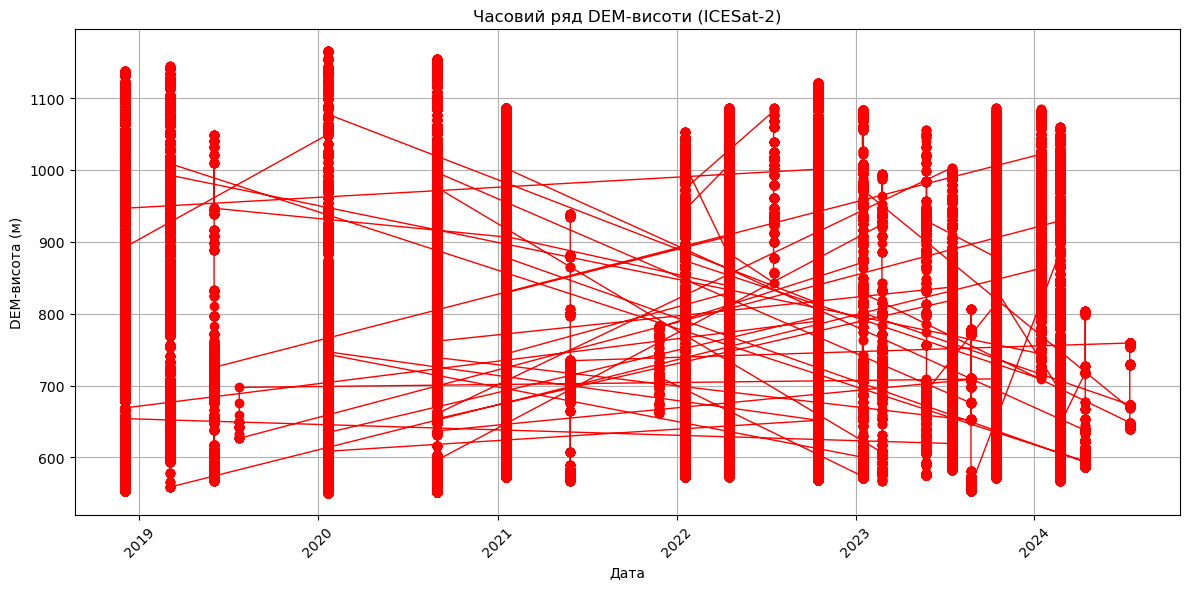

In [20]:

plt.figure(figsize=(12, 6))
plt.plot(ice_gdf.index, ice_gdf["dem_height"], marker="o", color="red", linewidth=1)

plt.title("–ß–∞—Å–æ–≤–∏–π —Ä—è–¥ DEM-–≤–∏—Å–æ—Ç–∏ (ICESat-2)")
plt.xlabel("–î–∞—Ç–∞")
plt.ylabel("DEM-–≤–∏—Å–æ—Ç–∞ (–º)")

plt.xticks(rotation=45)  # –ü–æ–≤–µ—Ä—Ç–∞—î –¥–∞—Ç–∏ –ø—ñ–¥ –∫—É—Ç–æ–º
plt.grid(True)
plt.tight_layout()
plt.show()


In [21]:
print(ice_gdf["rgt"].unique())


[998 396]


In [23]:
track_396 = ice_gdf[ice_gdf["rgt"] == 396].copy()
track_998 = ice_gdf[ice_gdf["rgt"] == 998].copy()


In [25]:
# –ü–æ–¥–∏–≤–∏–º–æ—Å—å —É–Ω—ñ–∫–∞–ª—å–Ω—ñ –∑–Ω–∞—á–µ–Ω–Ω—è –≤ –∫–æ–∂–Ω–æ–º—É RGT
for rgt_id in ice_gdf["rgt"].unique():
    subset = ice_gdf[ice_gdf["rgt"] == rgt_id]
    unique_gt = subset["gt"].unique()
    unique_spot = subset["spot"].unique()
    print(f"RGT {rgt_id}: {len(unique_gt)} gt -> {unique_gt}, spots: {unique_spot}")


RGT 998: 5 gt -> [50 60 40 30 10], spots: [5 6 2 1 4 3]
RGT 396: 6 gt -> [40 50 30 60 10 20], spots: [3 2 4 6 1 5]


In [26]:
track_396_s3 = ice_gdf[(ice_gdf["rgt"] == 396) & (ice_gdf["spot"] == 3)].copy()


In [27]:
track_396_s3 = track_396_s3.to_crs("EPSG:3857")  # –∞–±–æ EPSG:3035 –¥–ª—è –Ñ–≤—Ä–æ–ø–∏


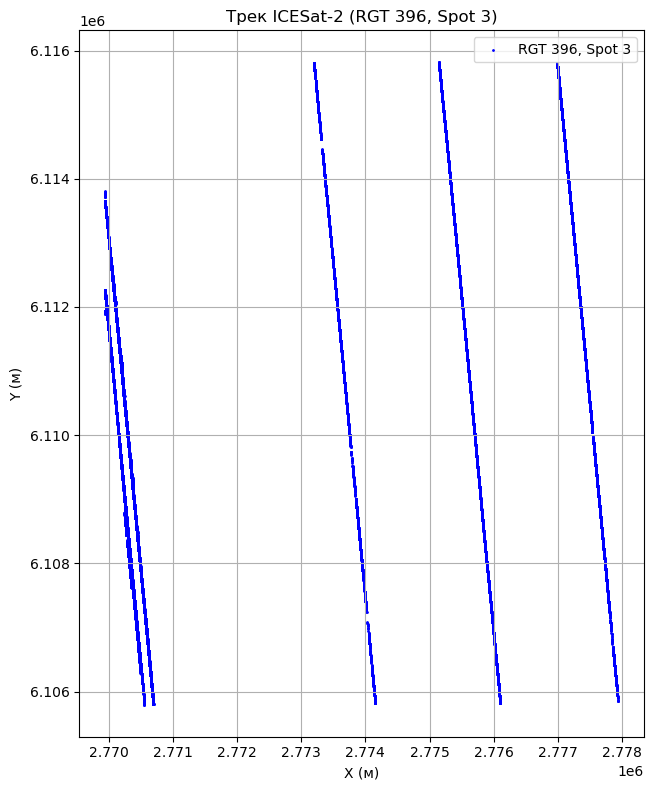

In [28]:

fig, ax = plt.subplots(figsize=(10, 8))
track_396_s3.plot(ax=ax, markersize=1, color="blue", label="RGT 396, Spot 3")

plt.title("–¢—Ä–µ–∫ ICESat-2 (RGT 396, Spot 3)")
plt.xlabel("X (–º)")
plt.ylabel("Y (–º)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [29]:
track_396_s3["time"] = track_396_s3.index.floor("D")
unique_days = track_396_s3["time"].dt.date.unique()
print(f"–ü—Ä–æ—Ö–æ–¥—ñ–≤: {len(unique_days)}")
print(sorted(unique_days))


–ü—Ä–æ—Ö–æ–¥—ñ–≤: 10
[datetime.date(2020, 1, 21), datetime.date(2021, 1, 18), datetime.date(2022, 1, 17), datetime.date(2022, 4, 18), datetime.date(2022, 7, 17), datetime.date(2022, 10, 16), datetime.date(2023, 1, 15), datetime.date(2023, 7, 16), datetime.date(2023, 10, 14), datetime.date(2024, 1, 13)]


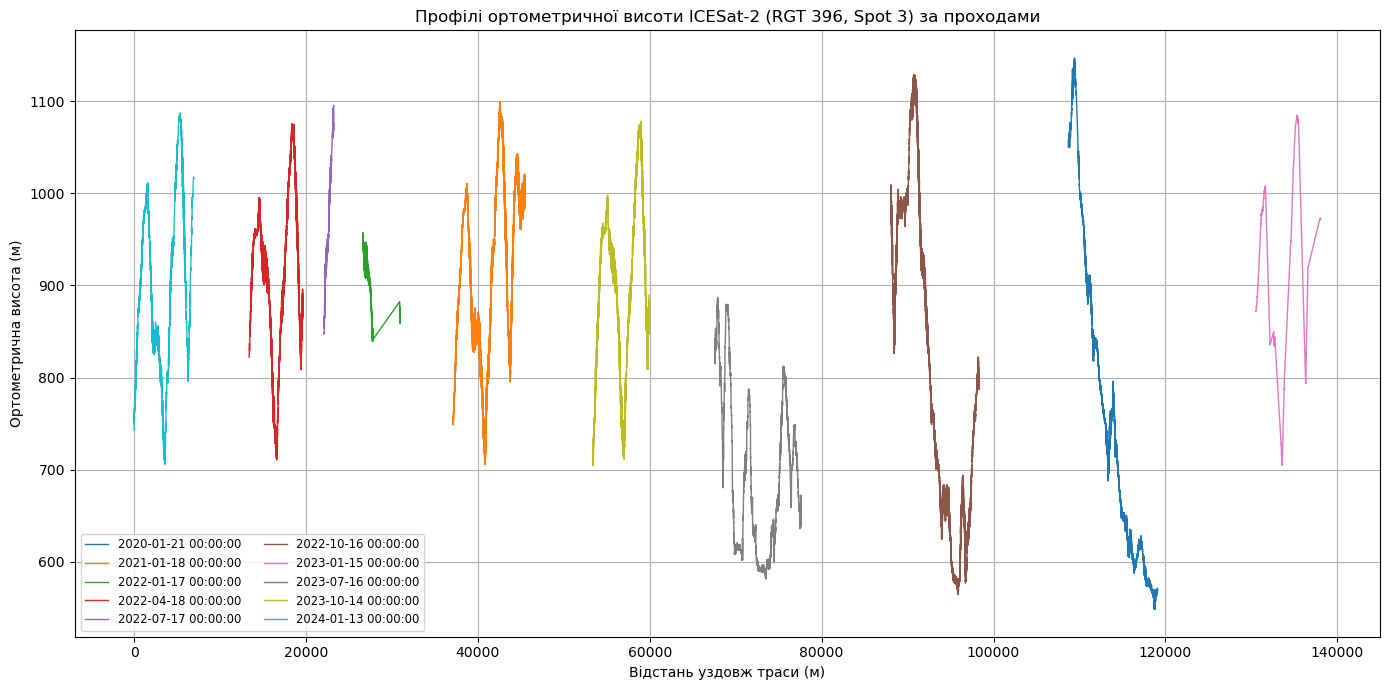

In [32]:

# –ü—ñ–¥–≥–æ—Ç–æ–≤–∫–∞
track_396_s3["time"] = track_396_s3.index.floor("D")
line_geom = LineString(track_396_s3.geometry.tolist())
track_396_s3["distance_m"] = track_396_s3.geometry.apply(lambda p: line_geom.project(p))

# –ü–æ–±—É–¥–æ–≤–∞
plt.figure(figsize=(14, 7))
for date, group in track_396_s3.groupby("time"):
    plt.plot(group["distance_m"], group["orthometric_height"], label=str(date), linewidth=1)

plt.title("–ü—Ä–æ—Ñ—ñ–ª—ñ –æ—Ä—Ç–æ–º–µ—Ç—Ä–∏—á–Ω–æ—ó –≤–∏—Å–æ—Ç–∏ ICESat-2 (RGT 396, Spot 3) –∑–∞ –ø—Ä–æ—Ö–æ–¥–∞–º–∏")
plt.xlabel("–í—ñ–¥—Å—Ç–∞–Ω—å —É–∑–¥–æ–≤–∂ —Ç—Ä–∞—Å–∏ (–º)")
plt.ylabel("–û—Ä—Ç–æ–º–µ—Ç—Ä–∏—á–Ω–∞ –≤–∏—Å–æ—Ç–∞ (–º)")
plt.grid(True)
plt.legend(fontsize='small', ncol=2)
plt.tight_layout()
plt.show()


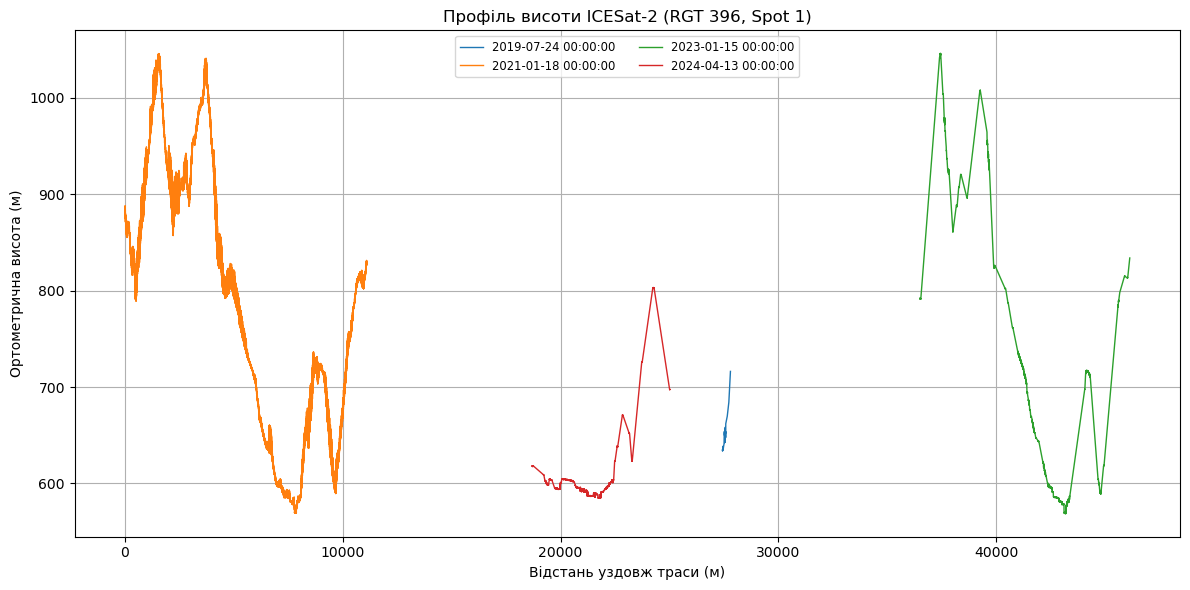

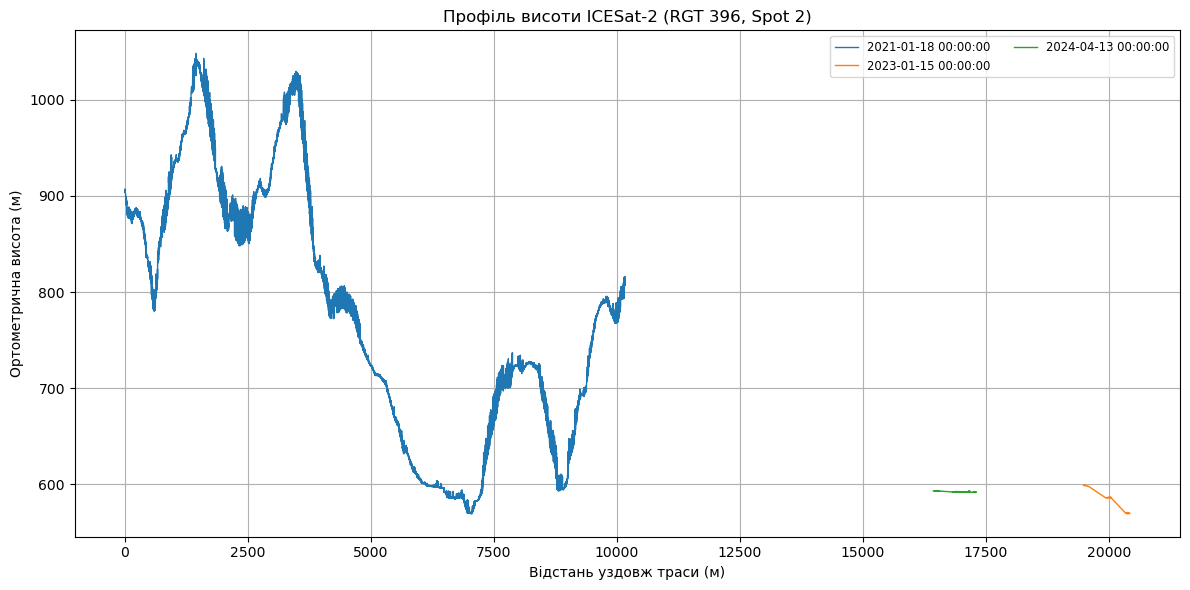

KeyboardInterrupt: 

In [33]:
rgt_396 = ice_gdf[ice_gdf["rgt"] == 396].copy()

# –ü–æ–±—É–¥–æ–≤–∞ –ø–æ –∫–æ–∂–Ω–æ–º—É spot
for spot_id in sorted(rgt_396["spot"].unique()):
    subset = rgt_396[rgt_396["spot"] == spot_id].copy()

    # –í—ñ–¥—Å—Ç–∞–Ω—å —É–∑–¥–æ–≤–∂ —Ç—Ä–∞—Å–∏
    subset = subset.to_crs("EPSG:3857")  # –º–µ—Ç—Ä–∏—á–Ω–∞ —Å–∏—Å—Ç–µ–º–∞
    line = LineString(subset.geometry.tolist())
    subset["distance_m"] = subset.geometry.apply(lambda p: line.project(p))

    # –ì—Ä–∞—Ñ—ñ–∫
    plt.figure(figsize=(12, 6))
    for date, group in subset.groupby(subset.index.floor("D")):
        plt.plot(group["distance_m"], group["orthometric_height"], label=str(date), linewidth=1)

    plt.title(f"–ü—Ä–æ—Ñ—ñ–ª—å –≤–∏—Å–æ—Ç–∏ ICESat-2 (RGT 396, Spot {spot_id})")
    plt.xlabel("–í—ñ–¥—Å—Ç–∞–Ω—å —É–∑–¥–æ–≤–∂ —Ç—Ä–∞—Å–∏ (–º)")
    plt.ylabel("–û—Ä—Ç–æ–º–µ—Ç—Ä–∏—á–Ω–∞ –≤–∏—Å–æ—Ç–∞ (–º)")
    plt.grid(True)
    plt.legend(fontsize='small', ncol=2)
    plt.tight_layout()
    plt.show()



In [34]:

# –ü—Ä–∏–ø—É—Å—Ç–∏–º–æ, ice_gdf ‚Äî —Ç–≤—ñ–π GeoDataFrame –∑ ICESat-2
filtered = ice_gdf[
    (ice_gdf["rgt"] == 396) &
    (ice_gdf["spot"] == 2) &
    (ice_gdf["atl03_cnf"] == 4) &
    (ice_gdf["quality_ph"] == 0)
].copy()


In [35]:
# –ü–µ—Ä–µ–≤–æ–¥–∏–º–æ –≤ –º–µ—Ç—Ä–∏—á–Ω—É —Å–∏—Å—Ç–µ–º—É (–Ω–∞–ø—Ä., ETRS89 / ETRS-LAEA Europe)
filtered = filtered.to_crs(epsg=3035)


In [39]:
from shapely.geometry import LineString

# 1. –í—ñ–¥—Å–æ—Ä—Ç—É–≤–∞—Ç–∏ —Ç–æ—á–∫–∏ –¥–ª—è –ø–æ–±—É–¥–æ–≤–∏ —Ç—Ä–µ–∫—É
filtered_sorted = filtered.sort_values("ph_index")
track_line = LineString(filtered_sorted.geometry.tolist())

# 2. –û–±—á–∏—Å–ª–∏—Ç–∏ –≤—ñ–¥—Å—Ç–∞–Ω—å —É–∑–¥–æ–≤–∂ —Ç—Ä–µ–∫—É
filtered["distance_m"] = filtered.geometry.apply(lambda point: track_line.project(point))



In [40]:
print(filtered.head())


                               region  gt  spacecraft_velocity  \
time_ns                                                          
2021-01-18 22:15:10.228352512       2  50          7108.371582   
2021-01-18 22:15:10.228352512       2  50          7108.371582   
2021-01-18 22:15:10.228452352       2  50          7108.371582   
2021-01-18 22:15:10.228552448       2  50          7108.371582   
2021-01-18 22:15:10.228552448       2  50          7108.371582   

                               solar_elevation  rgt  ph_index      height  \
time_ns                                                                     
2021-01-18 22:15:10.228352512       -62.168934  396   1544544  940.362732   
2021-01-18 22:15:10.228352512       -62.168934  396   1544546  940.481140   
2021-01-18 22:15:10.228452352       -62.168934  396   1544547  942.938843   
2021-01-18 22:15:10.228552448       -62.168934  396   1544549  942.866394   
2021-01-18 22:15:10.228552448       -62.168934  396   1544551  940.362366  

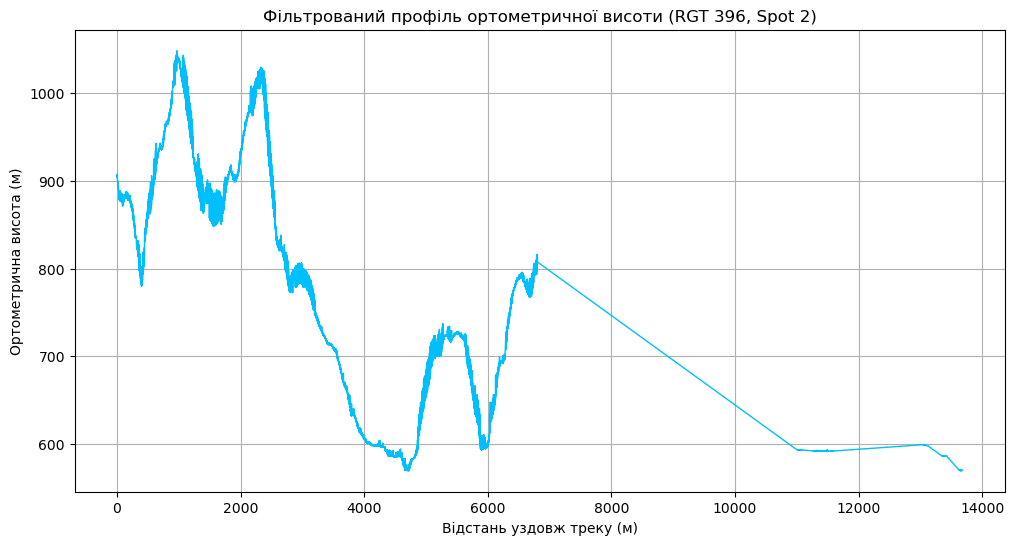

In [41]:
plt.figure(figsize=(12,6))
plt.plot(filtered["distance_m"], filtered["orthometric_height"], color="deepskyblue", linewidth=1)
plt.title("–§—ñ–ª—å—Ç—Ä–æ–≤–∞–Ω–∏–π –ø—Ä–æ—Ñ—ñ–ª—å –æ—Ä—Ç–æ–º–µ—Ç—Ä–∏—á–Ω–æ—ó –≤–∏—Å–æ—Ç–∏ (RGT 396, Spot 2)")
plt.xlabel("–í—ñ–¥—Å—Ç–∞–Ω—å —É–∑–¥–æ–≤–∂ —Ç—Ä–µ–∫—É (–º)")
plt.ylabel("–û—Ä—Ç–æ–º–µ—Ç—Ä–∏—á–Ω–∞ –≤–∏—Å–æ—Ç–∞ (–º)")
plt.grid(True)
plt.show()

In [43]:
print(ice_gdf.head())


                               region  gt  spacecraft_velocity  \
time_ns                                                          
2019-03-03 19:21:21.424650752       6  50          7108.268555   
2019-03-03 19:21:21.424750592       6  50          7108.268555   
2019-03-03 19:21:21.425250560       6  50          7108.268555   
2019-03-03 19:21:21.425750528       6  50          7108.268555   
2019-03-03 19:21:21.426050560       6  50          7108.268555   

                               solar_elevation  rgt  ph_index      height  \
time_ns                                                                     
2019-03-03 19:21:21.424650752       -32.253899  998    123498  646.714050   
2019-03-03 19:21:21.424750592       -32.253899  998    123499  650.420288   
2019-03-03 19:21:21.425250560       -32.253899  998    123500  647.244324   
2019-03-03 19:21:21.425750528       -32.253899  998    123503  647.487122   
2019-03-03 19:21:21.426050560       -32.253899  998    123504  644.189331  

                               region  gt  spacecraft_velocity  \
time_ns                                                          
2019-03-03 19:21:21.424650752       6  50          7108.268555   
2019-03-03 19:21:21.424750592       6  50          7108.268555   
2019-03-03 19:21:21.425250560       6  50          7108.268555   
2019-03-03 19:21:21.425750528       6  50          7108.268555   
2019-03-03 19:21:21.426050560       6  50          7108.268555   

                               solar_elevation  rgt  ph_index      height  \
time_ns                                                                     
2019-03-03 19:21:21.424650752       -32.253899  998    123498  646.714050   
2019-03-03 19:21:21.424750592       -32.253899  998    123499  650.420288   
2019-03-03 19:21:21.425250560       -32.253899  998    123500  647.244324   
2019-03-03 19:21:21.425750528       -32.253899  998    123503  647.487122   
2019-03-03 19:21:21.426050560       -32.253899  998    123504  644.189331  

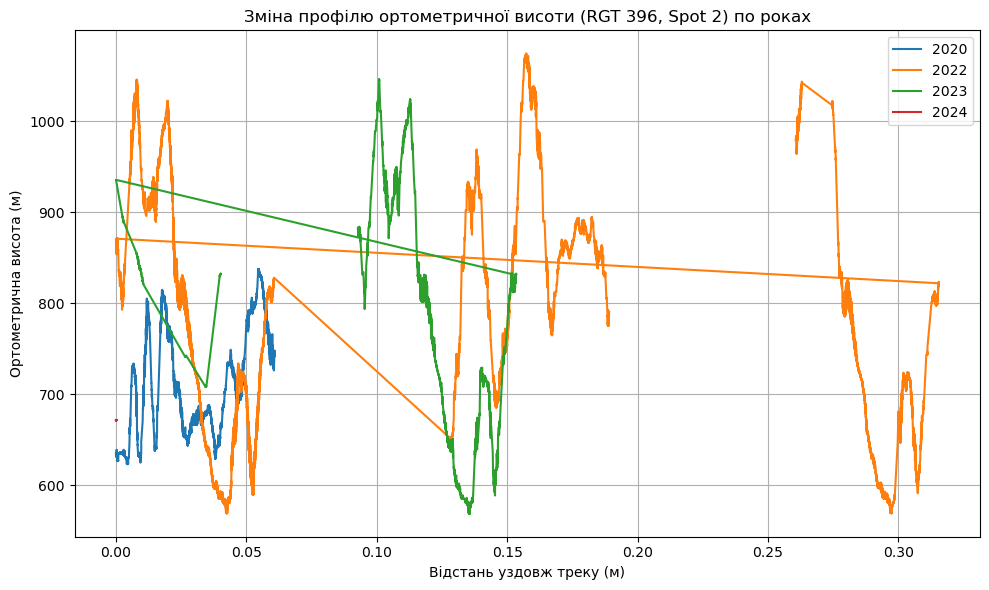

In [51]:
import matplotlib.pyplot as plt
from shapely.geometry import LineString
print(ice_gdf.head())
# –í–∏—Ç—è–≥—É—î–º–æ —Ä—ñ–∫ –∑ —ñ–Ω–¥–µ–∫—Å—É (DatetimeIndex)
ice_gdf['year'] = ice_gdf.index.year

# –ó–±–∏—Ä–∞—î–º–æ –≤—Å—ñ —É–Ω—ñ–∫–∞–ª—å–Ω—ñ —Ä–æ–∫–∏
years = sorted(ice_gdf['year'].unique())

# –°—Ç–≤–æ—Ä—é—î–º–æ –≥—Ä–∞—Ñ—ñ–∫
plt.figure(figsize=(10, 6))

for y in years:
    print(y)
    # –§—ñ–ª—å—Ç—Ä–∞—Ü—ñ—è –∑–∞ —Ä–æ–∫–æ–º, —Ç—Ä–µ–∫–æ–º, —Å–ø–æ—Ç–æ–º —ñ —è–∫—ñ—Å—Ç—é
    year_data = ice_gdf[
        (ice_gdf['rgt'] == 396) &
        (ice_gdf['spot'] == 6) &
        (ice_gdf['year'] == y) &
        (ice_gdf["atl03_cnf"] >= 3) &  # –ú'—è–∫—à–µ: –±—ñ–ª—å—à–µ –¥–æ–≤—ñ—Ä–∏
        # (ice_gdf["quality_ph"] == 1)
        (ice_gdf["atl08_class"].isin([1, 2, 3]))
    ].copy()

    # –Ø–∫—â–æ –Ω–µ–º–∞ –¥–∞–Ω–∏—Ö ‚Äî –ø—Ä–æ–ø—É—Å–∫–∞—î–º–æ
    if len(year_data) == 0:
        print(f"‚ùå {y}: –Ω–µ–º–∞—î —è–∫—ñ—Å–Ω–∏—Ö –¥–∞–Ω–∏—Ö")
        continue
    else:
        print(f"‚úÖ {y}: {len(year_data)} —Ç–æ—á–æ–∫")

    # –ü–æ–±—É–¥–æ–≤–∞ –ª—ñ–Ω—ñ—ó —Ç—Ä–µ–∫—É
    year_data_sorted = year_data.sort_values("ph_index")
    track_line = LineString(year_data_sorted.geometry.tolist())

    # –í—ñ–¥—Å—Ç–∞–Ω—å —É–∑–¥–æ–≤–∂ —Ç—Ä–µ–∫—É
    year_data["distance_m"] = year_data.geometry.apply(lambda pt: track_line.project(pt))

    # –ü–æ–±—É–¥–æ–≤–∞ –≥—Ä–∞—Ñ—ñ–∫–∞
    plt.plot(
        year_data["distance_m"],
        year_data["orthometric_height"],
        label=str(y)
    )

plt.title("–ó–º—ñ–Ω–∞ –ø—Ä–æ—Ñ—ñ–ª—é –æ—Ä—Ç–æ–º–µ—Ç—Ä–∏—á–Ω–æ—ó –≤–∏—Å–æ—Ç–∏ (RGT 396, Spot 2) –ø–æ —Ä–æ–∫–∞—Ö")
plt.xlabel("–í—ñ–¥—Å—Ç–∞–Ω—å —É–∑–¥–æ–≤–∂ —Ç—Ä–µ–∫—É (–º)")
plt.ylabel("–û—Ä—Ç–æ–º–µ—Ç—Ä–∏—á–Ω–∞ –≤–∏—Å–æ—Ç–∞ (–º)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


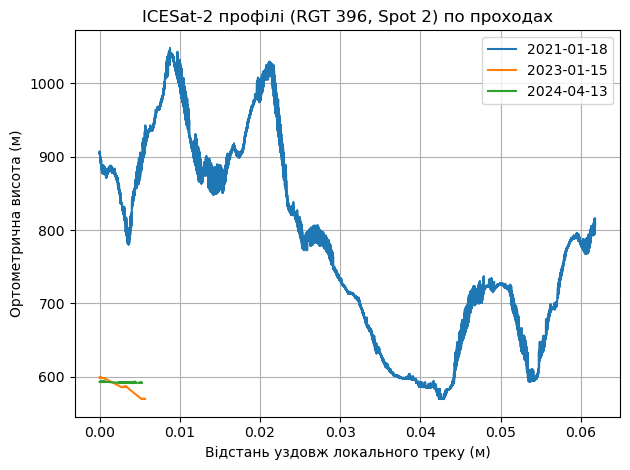

In [53]:
ice_gdf['date'] = ice_gdf.index.date
passes = ice_gdf[
    (ice_gdf['rgt'] == 396) &
    (ice_gdf['spot'] == 2)
]['date'].unique()
for d in sorted(passes):
    pass_data = ice_gdf[
        (ice_gdf['rgt'] == 396) &
        (ice_gdf['spot'] == 2) &
        (ice_gdf['date'] == d) &
        (ice_gdf["atl03_cnf"] == 4) &
        (ice_gdf["atl08_class"].isin([1, 2, 3]))
    ].copy()

    if len(pass_data) == 0:
        continue

    # –ü–æ–±—É–¥–æ–≤–∞ –ª–æ–∫–∞–ª—å–Ω–æ–≥–æ –ø—Ä–æ—Ñ—ñ–ª—é
    pass_data_sorted = pass_data.sort_values("ph_index")
    track_line = LineString(pass_data_sorted.geometry.tolist())
    pass_data["distance_m"] = pass_data.geometry.apply(lambda pt: track_line.project(pt))

    # –í—ñ–¥–æ–±—Ä–∞–∂–µ–Ω–Ω—è
    plt.plot(
        pass_data["distance_m"],
        pass_data["orthometric_height"],
        label=str(d)
    )

plt.title("ICESat-2 –ø—Ä–æ—Ñ—ñ–ª—ñ (RGT 396, Spot 2) –ø–æ –ø—Ä–æ—Ö–æ–¥–∞—Ö")
plt.xlabel("–í—ñ–¥—Å—Ç–∞–Ω—å —É–∑–¥–æ–≤–∂ –ª–æ–∫–∞–ª—å–Ω–æ–≥–æ —Ç—Ä–µ–∫—É (–º)")
plt.ylabel("–û—Ä—Ç–æ–º–µ—Ç—Ä–∏—á–Ω–∞ –≤–∏—Å–æ—Ç–∞ (–º)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [54]:
for d in sorted(passes):
    subset = ice_gdf[
        (ice_gdf['rgt'] == 396) &
        (ice_gdf['spot'] == 2) &
        (ice_gdf['date'] == d) &
        (ice_gdf["atl03_cnf"] == 4) &
        (ice_gdf["atl08_class"].isin([1, 2, 3]))
    ]
    print(f"{d}: {len(subset)} —Ç–æ—á–æ–∫")


2021-01-18: 11449 —Ç–æ—á–æ–∫
2023-01-15: 160 —Ç–æ—á–æ–∫
2024-04-13: 978 —Ç–æ—á–æ–∫


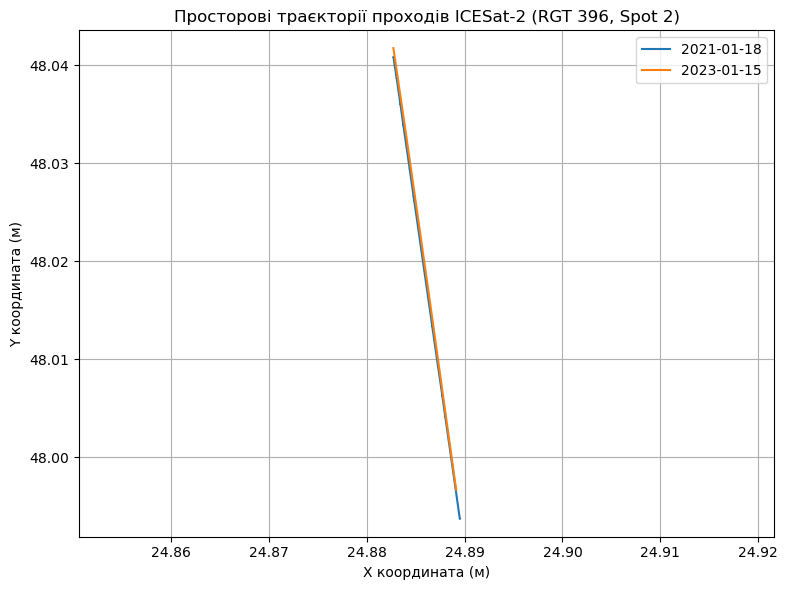

In [56]:
plt.figure(figsize=(8, 6))

for d in sorted(passes):
    sub = ice_gdf[
        (ice_gdf['rgt'] == 396) &
        (ice_gdf['spot'] == 3) &
        (ice_gdf['date'] == d)
    ]
    if len(sub) < 100:
        continue
    x = sub.geometry.x
    y = sub.geometry.y
    plt.plot(x, y, label=str(d))

plt.xlabel("X –∫–æ–æ—Ä–¥–∏–Ω–∞—Ç–∞ (–º)")
plt.ylabel("Y –∫–æ–æ—Ä–¥–∏–Ω–∞—Ç–∞ (–º)")
plt.title("–ü—Ä–æ—Å—Ç–æ—Ä–æ–≤—ñ —Ç—Ä–∞—î–∫—Ç–æ—Ä—ñ—ó –ø—Ä–æ—Ö–æ–¥—ñ–≤ ICESat-2 (RGT 396, Spot 2)")
plt.legend()
plt.axis("equal")
plt.grid(True)
plt.tight_layout()
plt.show()


2020-01-21: MAE = 3.24 –º, RMSE = 5.00 –º
2021-01-18: MAE = 7.40 –º, RMSE = 10.81 –º
2022-01-17: MAE = 12.45 –º, RMSE = 16.13 –º
2022-04-18: MAE = 7.11 –º, RMSE = 10.23 –º
2022-07-17: MAE = 5.46 –º, RMSE = 6.85 –º
2022-10-16: MAE = 6.57 –º, RMSE = 9.28 –º
2023-01-15: MAE = 2.58 –º, RMSE = 4.73 –º
2023-07-16: MAE = 4.13 –º, RMSE = 6.46 –º
2023-10-14: MAE = 6.62 –º, RMSE = 8.97 –º
2024-01-13: MAE = 6.82 –º, RMSE = 11.15 –º


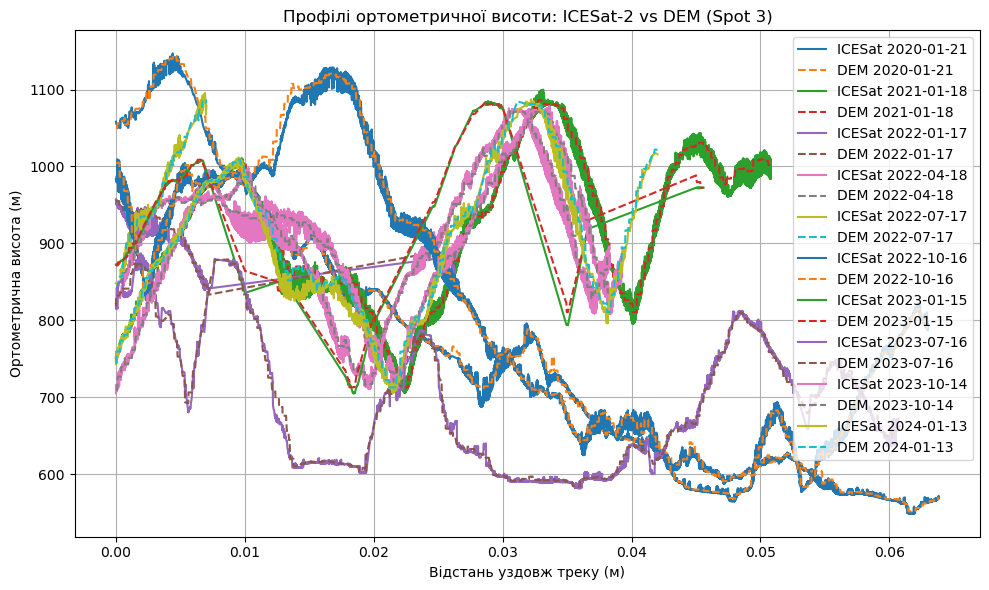

In [63]:
import matplotlib.pyplot as plt
from shapely.geometry import LineString
import numpy as np

# 1. –§—ñ–ª—å—Ç—Ä–∞—Ü—ñ—è –Ω–∞–¥—ñ–π–Ω–∏—Ö —Ç–æ—á–æ–∫ –ø–æ Spot 3
filtered = ice_gdf[
    (ice_gdf["rgt"] == 396) &
    (ice_gdf["spot"] == 3) &
    (ice_gdf["atl03_cnf"] == 4) &
    (ice_gdf["atl08_class"].isin([1, 2, 3]))
].copy()

# 2. –î–æ–¥–∞—Ç–∏ –¥–∞—Ç—É
filtered["date"] = filtered.index.date
dates = sorted(filtered["date"].unique())

# 3. –í—ñ–∑—É–∞–ª—ñ–∑–∞—Ü—ñ—è —Ç–∞ –æ–±—á–∏—Å–ª–µ–Ω–Ω—è –ø–æ –∫–æ–∂–Ω–æ–º—É –ø—Ä–æ—Ö–æ–¥—É
plt.figure(figsize=(10, 6))

for date in dates:
    df = filtered[filtered["date"] == date].copy()
    if df.empty:
        continue

    df_sorted = df.sort_values("ph_index")

    if len(df_sorted) < 5:
        continue  # –ø—Ä–æ–ø—É—Å—Ç–∏—Ç–∏ –Ω–∞–¥—Ç–æ –∫–æ—Ä–æ—Ç–∫—ñ –ø—Ä–æ—Ö–æ–¥–∏

    # –õ—ñ–Ω—ñ—è —Ç—Ä–µ–∫—É —Ç–∞ –æ–±—á–∏—Å–ª–µ–Ω–Ω—è –≤—ñ–¥—Å—Ç–∞–Ω—ñ
    line = LineString(df_sorted.geometry.tolist())
    df["distance_m"] = df.geometry.apply(lambda pt: line.project(pt))

    # –û–±—á–∏—Å–ª–µ–Ω–Ω—è —Ä—ñ–∑–Ω–∏—Ü—ñ
    df["delta"] = df["dem_height"] - df["orthometric_height"]
    mae = np.mean(np.abs(df["delta"]))
    rmse = np.sqrt(np.mean(df["delta"]**2))
    print(f"{date}: MAE = {mae:.2f} –º, RMSE = {rmse:.2f} –º")

    # –ü–æ–±—É–¥–æ–≤–∞ –≥—Ä–∞—Ñ—ñ–∫—ñ–≤
    plt.plot(df["distance_m"], df["orthometric_height"], label=f"ICESat {date}")
    plt.plot(df["distance_m"], df["dem_height"], '--', label=f"DEM {date}")

# –û—Ñ–æ—Ä–º–ª–µ–Ω–Ω—è –≥—Ä–∞—Ñ—ñ–∫–∞
plt.title("–ü—Ä–æ—Ñ—ñ–ª—ñ –æ—Ä—Ç–æ–º–µ—Ç—Ä–∏—á–Ω–æ—ó –≤–∏—Å–æ—Ç–∏: ICESat-2 vs DEM (Spot 3)")
plt.xlabel("–í—ñ–¥—Å—Ç–∞–Ω—å —É–∑–¥–æ–≤–∂ —Ç—Ä–µ–∫—É (–º)")
plt.ylabel("–û—Ä—Ç–æ–º–µ—Ç—Ä–∏—á–Ω–∞ –≤–∏—Å–æ—Ç–∞ (–º)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


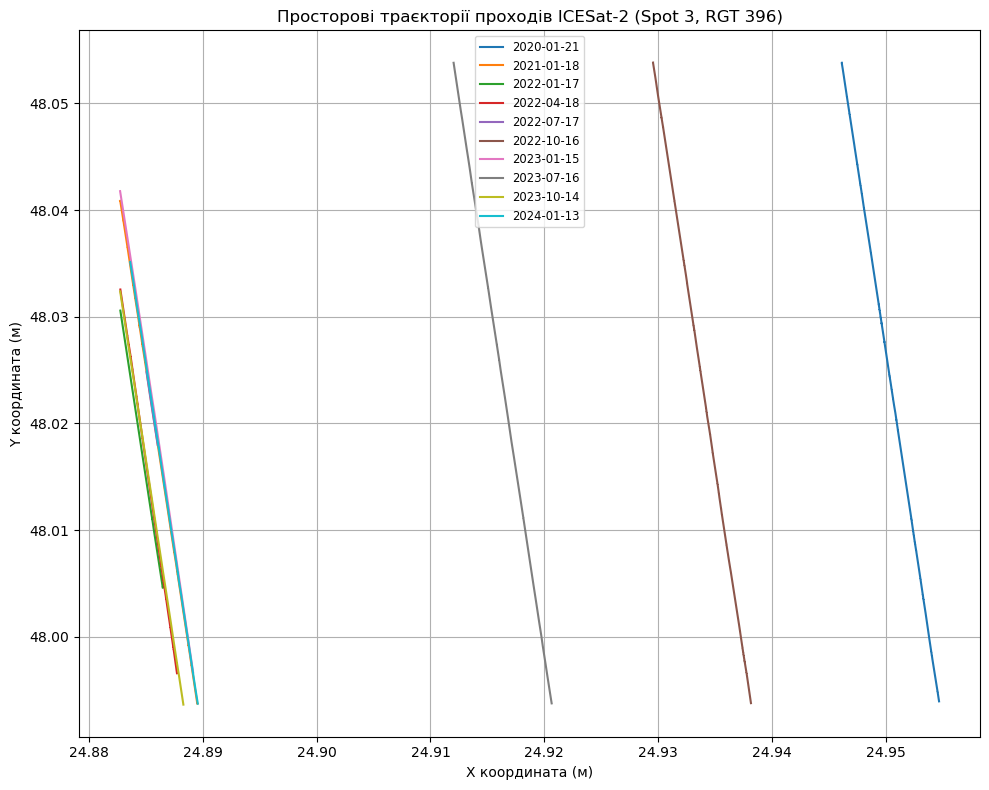

In [64]:
import matplotlib.pyplot as plt

# –£–ø–µ–≤–Ω–∏—Å—å, —â–æ –≤ —Ç–µ–±–µ —î –∫–æ–ª–æ–Ω–∫–∞ –∑ –¥–∞—Ç–æ—é
filtered['date'] = filtered.index.date
dates = sorted(filtered['date'].unique())

plt.figure(figsize=(10, 8))

for date in dates:
    df = filtered[filtered['date'] == date]

    if len(df) < 100:  # –ø—Ä–æ–ø—É—Å—Ç–∏—Ç–∏ –∫–æ—Ä–æ—Ç–∫—ñ –ø—Ä–æ—Ö–æ–¥–∏
        continue

    # –ë—É–¥—É—î–º–æ —Ç—Ä–∞—î–∫—Ç–æ—Ä—ñ—é
    x = df.geometry.x
    y = df.geometry.y

    plt.plot(x, y, label=str(date))

plt.title("–ü—Ä–æ—Å—Ç–æ—Ä–æ–≤—ñ —Ç—Ä–∞—î–∫—Ç–æ—Ä—ñ—ó –ø—Ä–æ—Ö–æ–¥—ñ–≤ ICESat-2 (Spot 3, RGT 396)")
plt.xlabel("X –∫–æ–æ—Ä–¥–∏–Ω–∞—Ç–∞ (–º)")
plt.ylabel("Y –∫–æ–æ—Ä–¥–∏–Ω–∞—Ç–∞ (–º)")
plt.legend(loc='best', fontsize='small')
plt.grid(True)
plt.tight_layout()
plt.show()


In [65]:
# –Ø–∫—â–æ —â–µ –Ω–µ –∑—Ä–æ–±–ª–µ–Ω–æ ‚Äî –ø–µ—Ä–µ–≤—ñ—Ä –ø–æ—Ç–æ—á–Ω—É —Å–∏—Å—Ç–µ–º—É –∫–æ–æ—Ä–¥–∏–Ω–∞—Ç
print(ice_gdf.crs)

# –ü–µ—Ä–µ–ø—Ä–æ—î–∫—Ç—É–π –¥–æ Web Mercator
ice_gdf_3857 = ice_gdf.to_crs(epsg=3857)


{"$schema": "https://proj.org/schemas/v0.7/projjson.schema.json", "type": "GeographicCRS", "name": "WGS 84 longitude-latitude", "datum": {"type": "GeodeticReferenceFrame", "name": "World Geodetic System 1984", "ellipsoid": {"name": "WGS 84", "semi_major_axis": 6378137, "inverse_flattening": 298.257223563}}, "coordinate_system": {"subtype": "ellipsoidal", "axis": [{"name": "Geodetic longitude", "abbreviation": "Lon", "direction": "east", "unit": "degree"}, {"name": "Geodetic latitude", "abbreviation": "Lat", "direction": "north", "unit": "degree"}]}, "id": {"authority": "OGC", "code": "CRS84"}}


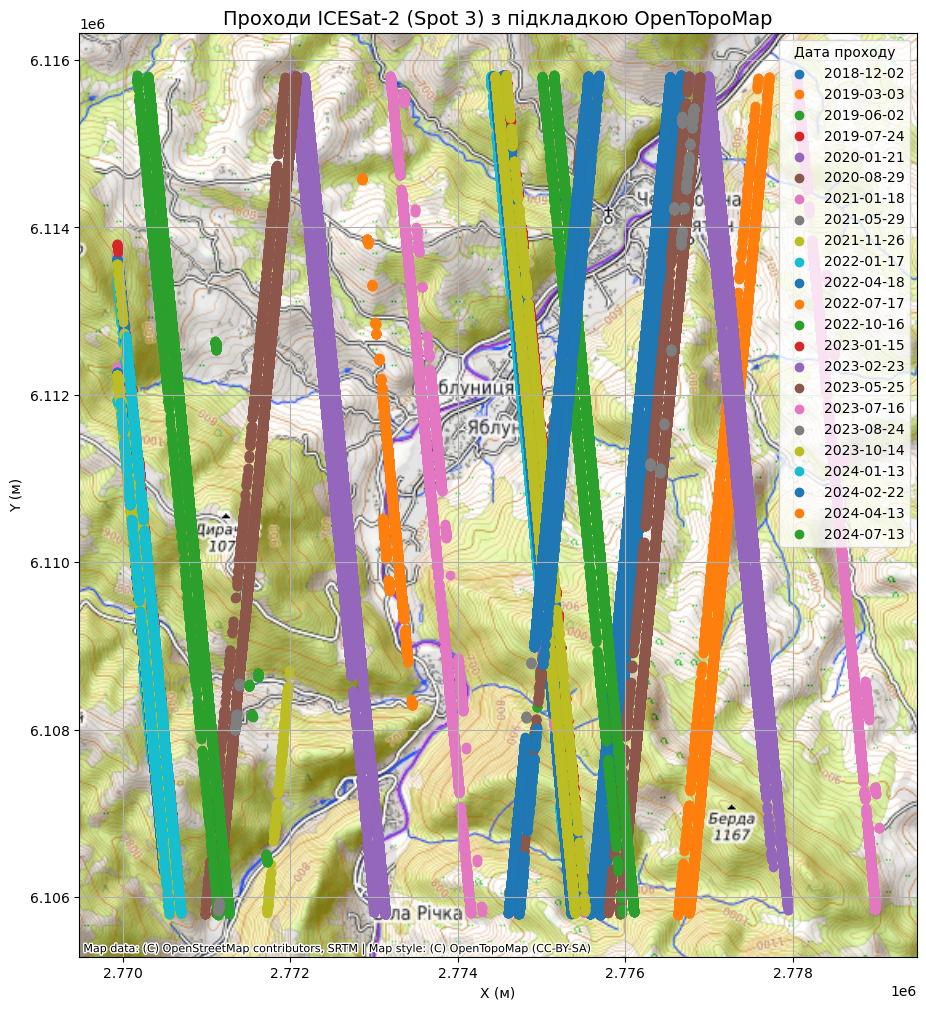

In [66]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx

# 1. –ü–µ—Ä–µ–ø—Ä–æ—î–∫—Ç—É–π GeoDataFrame –¥–æ Web Mercator
ice_gdf_3857 = ice_gdf.to_crs(epsg=3857)

# 2. –ì—Ä—É–ø—É–π –ø–æ –¥–∞—Ç–∞—Ö (–ø—Ä–∏–ø—É—Å–∫–∞—î–º–æ, —â–æ 'date' –≤–∂–µ —î –∫–æ–ª–æ–Ω–∫–æ—é)
fig, ax = plt.subplots(figsize=(12, 12))

for date, group in ice_gdf_3857.groupby('date'):
    group.plot(ax=ax, label=str(date), linewidth=1)

# 3. –î–æ–¥–∞–π OpenTopoMap
ctx.add_basemap(ax, source=ctx.providers.OpenTopoMap)

# 4. –û—Ñ–æ—Ä–º–ª–µ–Ω–Ω—è
ax.set_title("–ü—Ä–æ—Ö–æ–¥–∏ ICESat-2 (Spot 3) –∑ –ø—ñ–¥–∫–ª–∞–¥–∫–æ—é OpenTopoMap", fontsize=14)
ax.legend(title="–î–∞—Ç–∞ –ø—Ä–æ—Ö–æ–¥—É")
plt.xlabel("X (–º)")
plt.ylabel("Y (–º)")
plt.grid(True)
plt.show()


In [67]:
min_points = 1000
good_dates = filtered.groupby('date').filter(lambda x: len(x) > min_points)['date'].unique()


In [69]:
results = []

for date in dates:
    df = filtered[filtered['date'] == date].copy()

    if df.empty:
        continue

    # –°–æ—Ä—Ç—É–≤–∞–Ω–Ω—è —Ç–∞ –æ–±—á–∏—Å–ª–µ–Ω–Ω—è –¥–∏—Å—Ç–∞–Ω—Ü—ñ—ó –≤–∑–¥–æ–≤–∂ —Ç—Ä–µ–∫—É
    df_sorted = df.sort_values("ph_index")
    line = LineString(df_sorted.geometry.tolist())
    df["distance_m"] = df.geometry.apply(lambda pt: line.project(pt))

    # –†—ñ–∑–Ω–∏—Ü—è DEM - ICESat
    df["delta"] = df["dem_height"] - df["orthometric_height"]

    # –°—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞
    mae = np.mean(np.abs(df["delta"]))
    rmse = np.sqrt(np.mean(df["delta"]**2))
    results.append((str(date), len(df), mae, rmse))

# –°–æ—Ä—Ç—É—î–º–æ –∑–∞ RMSE
sorted_results = sorted(results, key=lambda x: x[3])  # —Å–æ—Ä—Ç—É–≤–∞–Ω–Ω—è –∑–∞ RMSE

# –í–∏–≤–æ–¥–∏–º–æ —Ç–æ–ø 5
for date, n, mae, rmse in sorted_results[:5]:
    print(f"{date}: {n} —Ç–æ—á–æ–∫ | MAE = {mae:.2f} –º | RMSE = {rmse:.2f} –º")



2023-01-15: 1090 —Ç–æ—á–æ–∫ | MAE = 2.58 –º | RMSE = 4.73 –º
2020-01-21: 26333 —Ç–æ—á–æ–∫ | MAE = 3.24 –º | RMSE = 5.00 –º
2023-07-16: 6983 —Ç–æ—á–æ–∫ | MAE = 4.13 –º | RMSE = 6.46 –º
2022-07-17: 649 —Ç–æ—á–æ–∫ | MAE = 5.46 –º | RMSE = 6.85 –º
2023-10-14: 4907 —Ç–æ—á–æ–∫ | MAE = 6.62 –º | RMSE = 8.97 –º


In [86]:
for date, n, mae, rmse in sorted_results[:10]:
    print(f"{date}: {n} —Ç–æ—á–æ–∫ | MAE = {mae:.2f} –º | RMSE = {rmse:.2f} –º")

2023-01-15: 1090 —Ç–æ—á–æ–∫ | MAE = 2.58 –º | RMSE = 4.73 –º
2020-01-21: 26333 —Ç–æ—á–æ–∫ | MAE = 3.24 –º | RMSE = 5.00 –º
2023-07-16: 6983 —Ç–æ—á–æ–∫ | MAE = 4.13 –º | RMSE = 6.46 –º
2022-07-17: 649 —Ç–æ—á–æ–∫ | MAE = 5.46 –º | RMSE = 6.85 –º
2023-10-14: 4907 —Ç–æ—á–æ–∫ | MAE = 6.62 –º | RMSE = 8.97 –º
2022-10-16: 8737 —Ç–æ—á–æ–∫ | MAE = 6.57 –º | RMSE = 9.28 –º
2022-04-18: 11769 —Ç–æ—á–æ–∫ | MAE = 7.11 –º | RMSE = 10.23 –º
2021-01-18: 26599 —Ç–æ—á–æ–∫ | MAE = 7.40 –º | RMSE = 10.81 –º
2024-01-13: 5134 —Ç–æ—á–æ–∫ | MAE = 6.82 –º | RMSE = 11.15 –º
2022-01-17: 2041 —Ç–æ—á–æ–∫ | MAE = 12.45 –º | RMSE = 16.13 –º


In [87]:
import numpy as np

# sorted_results –º–∞—î –≤–∏–≥–ª—è–¥: [(date, n_points, mae, rmse), ...]
mae_values = [mae for _, _, mae, _ in sorted_results]
rmse_values = [rmse for _, _, _, rmse in sorted_results]
n_values = [n for _, n, _, _ in sorted_results]

# –ó–≤–∞–∂–µ–Ω—ñ —Å–µ—Ä–µ–¥–Ω—ñ (–∑–∞ –∫—ñ–ª—å–∫—ñ—Å—Ç—é —Ç–æ—á–æ–∫)
weighted_mae = np.average(mae_values, weights=n_values)
weighted_rmse = np.sqrt(np.average([r**2 for r in rmse_values], weights=n_values))

# –ü—Ä–æ—Å—Ç–µ —Å–µ—Ä–µ–¥–Ω—î (–∞—Ä–∏—Ñ–º–µ—Ç–∏—á–Ω–µ)
mean_mae = np.mean(mae_values)
mean_rmse = np.mean(rmse_values)

print(f"–°–µ—Ä–µ–¥–Ω—î MAE (–∞—Ä–∏—Ñ–º–µ—Ç–∏—á–Ω–µ): {mean_mae:.2f} –º")
print(f"–°–µ—Ä–µ–¥–Ω—î RMSE (–∞—Ä–∏—Ñ–º–µ—Ç–∏—á–Ω–µ): {mean_rmse:.2f} –º")
print(f"–ó–≤–∞–∂–µ–Ω–µ MAE (–∑–∞ —Ç–æ—á–∫–∞–º–∏): {weighted_mae:.2f} –º")
print(f"–ó–≤–∞–∂–µ–Ω–µ RMSE (–∑–∞ —Ç–æ—á–∫–∞–º–∏): {weighted_rmse:.2f} –º")


–°–µ—Ä–µ–¥–Ω—î MAE (–∞—Ä–∏—Ñ–º–µ—Ç–∏—á–Ω–µ): 6.24 –º
–°–µ—Ä–µ–¥–Ω—î RMSE (–∞—Ä–∏—Ñ–º–µ—Ç–∏—á–Ω–µ): 8.96 –º
–ó–≤–∞–∂–µ–Ω–µ MAE (–∑–∞ —Ç–æ—á–∫–∞–º–∏): 5.85 –º
–ó–≤–∞–∂–µ–Ω–µ RMSE (–∑–∞ —Ç–æ—á–∫–∞–º–∏): 9.02 –º


In [1]:
top_dates = ["2025-05-07"]

for date in top_dates:
    date_obj = pd.to_datetime(date).date()
    df = filtered[filtered['date'] == date_obj].copy()

    if df.empty:
        continue

    df_sorted = df.sort_values("ph_index")
    line = LineString(df_sorted.geometry.tolist())
    df["distance_m"] = df.geometry.apply(lambda pt: line.project(pt))

    plt.plot(df["distance_m"], df["orthometric_height"], label=f"ICESat {date}")
    plt.plot(df["distance_m"], df["dem_height"], '--', label=f"DEM {date}")

plt.title("–ü—Ä–æ—Ñ—ñ–ª—è –æ—Ä—Ç–æ–º–µ—Ç—Ä–∏—á–Ω–æ—ó –≤–∏—Å–æ—Ç–∏ EVRF 2007: ICESat-2 vs DEM TanDEM-X")
plt.xlabel("–í—ñ–¥—Å—Ç–∞–Ω—å —É–∑–¥–æ–≤–∂ —Ç—Ä–µ–∫—É (–º)")
plt.ylabel("–í–∏—Å–æ—Ç–∞ (–º)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


NameError: name 'pd' is not defined

In [82]:


def plot_profiles(
    df,
    group_column='date',
    title=None,
    figsize=(10, 6),
    dem_label="DEM",
    color_map_name='tab10',
    language="uk",  # "uk", "en", or "both"
    dem_name="DEM",
    save_path=None
):
    """
    –ü–æ–±—É–¥–æ–≤–∞ –ø–æ—Ä—ñ–≤–Ω—è–ª—å–Ω–∏—Ö –ø—Ä–æ—Ñ—ñ–ª—ñ–≤ –æ—Ä—Ç–æ–º–µ—Ç—Ä–∏—á–Ω–∏—Ö –≤–∏—Å–æ—Ç (ICESat-2 vs DEM) –∑ –∞–≤—Ç–æ–º–∞—Ç–∏—á–Ω–∏–º –∫–æ–ª—å–æ—Ä–æ–º.

    Parameters:
        df : pd.DataFrame
            –î–∞–Ω—ñ, —è–∫—ñ –º–∞—é—Ç—å –∫–æ–ª–æ–Ω–∫–∏: geometry, ph_index, orthometric_height, dem_height, group_column.
        group_column : str
            –ö–æ–ª–æ–Ω–∫–∞ –¥–ª—è –≥—Ä—É–ø—É–≤–∞–Ω–Ω—è (–Ω–∞–ø—Ä–∏–∫–ª–∞–¥, 'date' –∞–±–æ 'track_id').
        title : str
            –ù–∞–∑–≤–∞ –≥—Ä–∞—Ñ—ñ–∫–∞.
        figsize : tuple
            –†–æ–∑–º—ñ—Ä –≥—Ä–∞—Ñ—ñ–∫–∞ (default (10, 6)).
        dem_label : str
            –¢–µ–∫—Å—Ç –¥–ª—è –ø—ñ–¥–ø–∏—Å—É DEM —É –ª–µ–≥–µ–Ω–¥—ñ (–≤—ñ–¥–æ–±—Ä–∞–∂–∞—î—Ç—å—Å—è –æ–¥–∏–Ω —Ä–∞–∑).
        color_map_name : str
            –ù–∞–∑–≤–∞ –ø–∞–ª—ñ—Ç—Ä–∏ matplotlib (–Ω–∞–ø—Ä–∏–∫–ª–∞–¥, 'tab10', 'Set1', 'Dark2', 'viridis').
        language : str
            –ú–æ–≤–∞: "uk", "en" –∞–±–æ "both".
        dem_name : str
            –ù–∞–∑–≤–∞ DEM (TanDEM-X, FABDEM —Ç–æ—â–æ), –±—É–¥–µ –≤ –∑–∞–≥–æ–ª–æ–≤–∫—É.
        save_path : str
            –®–ª—è—Ö –¥–ª—è –∑–±–µ—Ä–µ–∂–µ–Ω–Ω—è –≥—Ä–∞—Ñ—ñ–∫–∞ (–Ω–∞–ø—Ä–∏–∫–ª–∞–¥, "output.png"). –Ø–∫—â–æ None ‚Äî –≥—Ä–∞—Ñ—ñ–∫ –ª–∏—à–µ –ø–æ–∫–∞–∑—É—î—Ç—å—Å—è.
    """

    unique_groups = sorted(df[group_column].dropna().unique())
    cmap = plt.get_cmap(color_map_name)
    color_map = {group: cmap(i % cmap.N) for i, group in enumerate(unique_groups)}

    plt.style.use('default')  # –±—ñ–ª–∏–π —Ñ–æ–Ω
    plt.figure(figsize=figsize)

    dem_plotted = False

    for group in unique_groups:
        df_group = df[df[group_column] == group].copy()
        if df_group.empty:
            continue

        df_sorted = df_group.sort_values("ph_index")
        line = LineString(df_sorted.geometry.tolist())
        df_sorted["distance_m"] = df_sorted.geometry.apply(lambda pt: line.project(pt))

        plt.plot(df_sorted["distance_m"], df_sorted["orthometric_height"],
                 label=f"ICESat-2 {group}",
                 color=color_map[group],
                 linewidth=2)

        # DEM ‚Äî –æ–¥–∏–Ω —Ä–∞–∑ —É –ª–µ–≥–µ–Ω–¥—ñ
        dem_legend = dem_label if not dem_plotted else "_nolegend_"
        plt.plot(df_sorted["distance_m"], df_sorted["dem_height"],
                 label=dem_legend,
                 color='gray',
                 linestyle='--',
                 linewidth=1.5)
        dem_plotted = True

    # –î–∏–Ω–∞–º—ñ—á–Ω–∞ –Ω–∞–∑–≤–∞
    if not title:
        if language == "uk":
            title = f"–ü–æ—Ä—ñ–≤–Ω—è–Ω–Ω—è –æ—Ä—Ç–æ–º–µ—Ç—Ä–∏—á–Ω–∏—Ö –≤–∏—Å–æ—Ç ICESat-2 —ñ DEM ({dem_name}) —É —Å–∏—Å—Ç–µ–º—ñ EVRF2007"
            ylabel = "–û—Ä—Ç–æ–º–µ—Ç—Ä–∏—á–Ω–∞ –≤–∏—Å–æ—Ç–∞ (–º –Ω.—Ä.–º.)"
            xlabel = "–í—ñ–¥—Å—Ç–∞–Ω—å —É–∑–¥–æ–≤–∂ —Ç—Ä–µ–∫—É (–º)"
        elif language == "en":
            title = f"Comparison of orthometric heights from ICESat-2 and {dem_name} DEM in the EVRF2007 system"
            ylabel = "Orthometric height (m a.s.l.)"
            xlabel = "Distance along track (m)"
        elif language == "both":
            title = f"–ü–æ—Ä—ñ–≤–Ω—è–Ω–Ω—è –æ—Ä—Ç–æ–º–µ—Ç—Ä–∏—á–Ω–∏—Ö –≤–∏—Å–æ—Ç (EVRF2007)\nComparison of orthometric heights from ICESat-2 and {dem_name} DEM"
            ylabel = "–û—Ä—Ç–æ–º–µ—Ç—Ä–∏—á–Ω–∞ –≤–∏—Å–æ—Ç–∞ (–º –Ω.—Ä.–º.) / Orthometric height (m a.s.l.)"
            xlabel = "–í—ñ–¥—Å—Ç–∞–Ω—å —É–∑–¥–æ–≤–∂ —Ç—Ä–µ–∫—É (–º) / Distance along track (m)"
        else:
            title = "Orthometric height profiles"
            ylabel = "Height (m)"
            xlabel = "Distance (m)"

    plt.title(title, fontsize=14)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.5)

    # –í–ø–æ—Ä—è–¥–∫—É–≤–∞–Ω–Ω—è –ª–µ–≥–µ–Ω–¥–∏: DEM –∑–∞–≤–∂–¥–∏ –æ—Å—Ç–∞–Ω–Ω—ñ–π
    handles, labels = plt.gca().get_legend_handles_labels()
    dem_entries = [(h, l) for h, l in zip(handles, labels) if l == dem_label]
    other_entries = [(h, l) for h, l in zip(handles, labels) if l != dem_label]
    sorted_handles, sorted_labels = zip(*(other_entries + dem_entries))
    plt.legend(sorted_handles, sorted_labels,
               loc='center left', bbox_to_anchor=(1, 0.5),
               fontsize=10, frameon=False)

    plt.tight_layout()

    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
    else:
        plt.show()



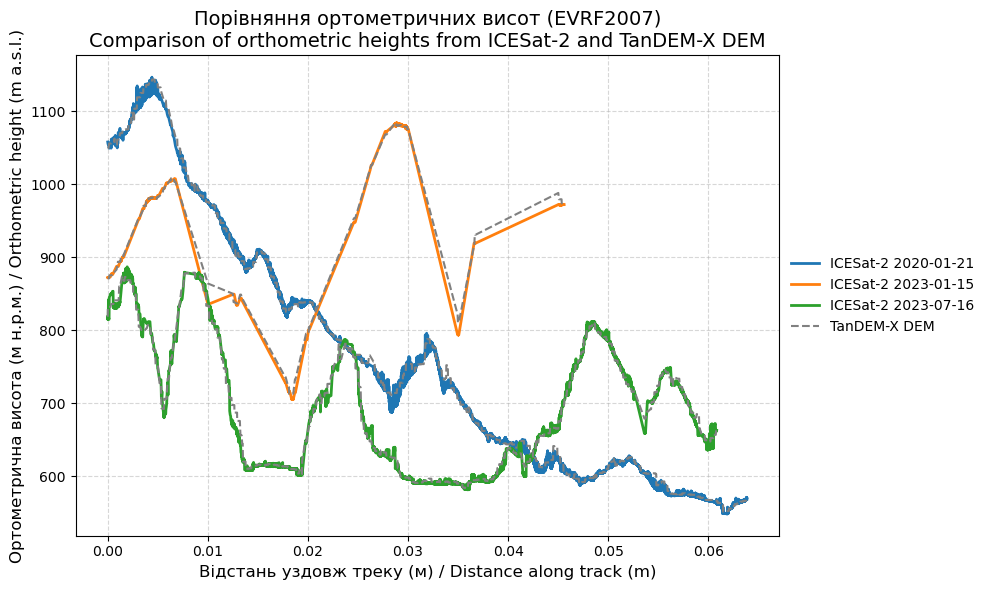

In [84]:
top_dates = ["2023-01-15", "2020-01-21", "2023-07-16"]
top_dates_dt = [pd.to_datetime(d).date() for d in top_dates]
filtered_subset = filtered[filtered["date"].isin(top_dates_dt)]

plot_profiles(
    df=filtered_subset,
    dem_label="TanDEM-X DEM",
    dem_name="TanDEM-X",
    language="both",  # "uk", "en", –∞–±–æ "both"
    save_path="output/icesat_vs_tandem_bilingual.png"
)



In [42]:
import numpy as np

# –ü–æ—Ö–∏–±–∫–∞: DEM - ICESat
ice_gdf["error"] = ice_gdf["dem_height"] - ice_gdf["orthometric_height"]

# –í–∏–¥–∞–ª—è—î–º–æ NaN
errors = ice_gdf["error"].dropna()

# –°—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞
rmse = np.sqrt(np.mean(errors**2))
bias = np.mean(errors)
std = np.std(errors)
iqr = np.percentile(errors, 75) - np.percentile(errors, 25)

print(f"üìä RMSE: {rmse:.2f} –º")
print(f"üìä –°–µ—Ä–µ–¥–Ω—è –ø–æ—Ö–∏–±–∫–∞ (Bias): {bias:.2f} –º")
print(f"üìä –°—Ç–∞–Ω–¥–∞—Ä—Ç–Ω–µ –≤—ñ–¥—Ö–∏–ª–µ–Ω–Ω—è: {std:.2f} –º")
print(f"üìä IQR (–º—ñ–∂–∫–≤–∞—Ä—Ç–∏–ª—å–Ω–∏–π —Ä–æ–∑–º–∞—Ö): {iqr:.2f} –º")


üìä RMSE: 9.21 –º
üìä –°–µ—Ä–µ–¥–Ω—è –ø–æ—Ö–∏–±–∫–∞ (Bias): 3.42 –º
üìä –°—Ç–∞–Ω–¥–∞—Ä—Ç–Ω–µ –≤—ñ–¥—Ö–∏–ª–µ–Ω–Ω—è: 8.55 –º
üìä IQR (–º—ñ–∂–∫–≤–∞—Ä—Ç–∏–ª—å–Ω–∏–π —Ä–æ–∑–º–∞—Ö): 6.34 –º


In [88]:
import matplotlib.pyplot as plt

plt.hist(errors, bins=50, edgecolor='black', color='gray')
plt.title("–†–æ–∑–ø–æ–¥—ñ–ª –ø–æ—Ö–∏–±–æ–∫ DEM - ICESat (–æ—Ä—Ç–æ–º–µ—Ç—Ä–∏—á–Ω—ñ)")
plt.xlabel("–ü–æ—Ö–∏–±–∫–∞ (–º)")
plt.ylabel("–ö—ñ–ª—å–∫—ñ—Å—Ç—å —Ç–æ—á–æ–∫")
plt.grid(True)
plt.show()


NameError: name 'errors' is not defined

In [44]:
gdf_profile = ice_gdf.dropna(subset=["orthometric_height", "dem_height"]).copy()

# –ü–µ—Ä–µ–≤–æ–¥–∏–º–æ –≥–µ–æ–º–µ—Ç—Ä—ñ—é –≤ ETRS-LAEA (–¥–ª—è –∞–Ω–∞–ª—ñ–∑—É –ø–æ –Ñ–≤—Ä–æ–ø—ñ)
gdf_profile = gdf_profile.to_crs("EPSG:3035")


In [45]:
import numpy as np

# –í–∏—Ç—è–≥—É—î–º–æ –∫–æ–æ—Ä–¥–∏–Ω–∞—Ç–∏
gdf_profile["x"] = gdf_profile.geometry.x
gdf_profile["y"] = gdf_profile.geometry.y

# –û–±—á–∏—Å–ª—é—î–º–æ –Ω–∞—Ä–æ—Å—Ç–∞—é—á—É –≤—ñ–¥—Å—Ç–∞–Ω—å –º—ñ–∂ —Ç–æ—á–∫–∞–º–∏ (–∫—Ä–æ–∫–æ–≤–∞ —Å—É–º–∞)
gdf_profile = gdf_profile.sort_values(by=["x", "y"])  # –∞–±–æ –ø–æ —á–∞—Å—É, —è–∫—â–æ —î
coords = gdf_profile[["x", "y"]].values
distances = np.linalg.norm(np.diff(coords, axis=0), axis=1)
distances = np.insert(np.cumsum(distances), 0, 0)  # –ø–æ—á–∏–Ω–∞—î–º–æ –∑ 0

gdf_profile["distance_m"] = distances


In [47]:
# –õ—ñ–Ω—ñ—è –∑ —É—Å—ñ—Ö —Ç–æ—á–æ–∫ ‚Äî —Ç—Ä–∞—î–∫—Ç–æ—Ä—ñ—è —Å—É–ø—É—Ç–Ω–∏–∫–∞
from shapely.geometry import LineString

track_line = LineString(gdf_profile.geometry.tolist())

